In [6]:
from imgaug import augmenters as iaa
import numpy as np
import imageio
import os

Original:


/tmp/ipykernel_1202/4145903023.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("test.jpg")
/root/miniconda3/lib/python3.8/site-packages/imgaug/imgaug.py:2120: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title("imgaug.imshow(%s)" % (image.shape,))


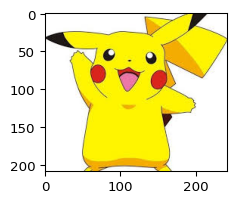

In [2]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("test.jpg")

print("Original:")
ia.imshow(image)

Augmented:


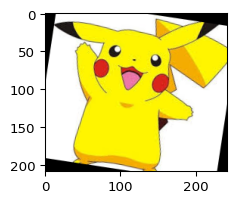

In [4]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-90, 90))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

In [27]:
from imgaug import augmenters as iaa
import numpy as np
import imageio
import os
import warnings
warnings.filterwarnings('ignore')
image_dir = 'no-beads/'
output_folder = 'aug_/'
os.makedirs(output_folder, exist_ok=True)
seq = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.Affine(rotate=(-45, 45))),  # rotate by -45 to +45 degrees, apply 50% of the time
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=(0, 0.10*255))),  # add gaussian noise, apply 50% of the time
    iaa.Sometimes(0.5, iaa.Crop(percent=(0, 0.2))),  # random crops, apply 50% of the time
    iaa.Sometimes(0.6, iaa.GaussianBlur(sigma=(0, 1.0))),  # apply blur, apply 50% of the time
    iaa.Sometimes(0.5, iaa.LinearContrast((0.75, 1.5))),  # change contrast, apply 50% of the time
    iaa.Sometimes(0.5, iaa.Multiply((0.8, 1.2))),  # change brightness, apply 50% of the time
    iaa.Sometimes(0.5, iaa.ElasticTransformation(alpha=90, sigma=0.25)),  # apply elastic transformations, apply 50% of the time
    iaa.Sometimes(0.5, iaa.CoarseDropout(0.02, size_percent=0.5)),  # randomly remove up to 10% of the pixels, apply 50% of the time
    iaa.Sometimes(0.5, iaa.BlendAlphaCheckerboard(nb_rows=2,nb_cols=(1,4),foreground=iaa.AddToHue((-100, 100)))),
    iaa.Sometimes(0.5, iaa.SigmoidContrast(gain=(3, 10), cutoff=(0.4, 0.6), per_channel=True)),
    iaa.Sometimes(0.6,iaa.Rain()),
    iaa.Sometimes(0.5, iaa.Fog())
], random_order=True)  # apply augmenters in random order
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

number_of_augmented_images = 1
for file_name in image_files:
    image_path = os.path.join(image_dir, file_name)
    image = imageio.imread(image_path)
    if image.shape[2] == 4:
        image = image[:, :, :3]
    augmented_images = seq(images=[image for _ in range(number_of_augmented_images)])
    for i, aug_img in enumerate(augmented_images):
        augmented_file_name = f"augmented_{i}_{file_name}"
        imageio.imwrite(os.path.join(output_folder, augmented_file_name), aug_img)


In [46]:
from imgaug import augmenters as iaa
import numpy as np
import imageio
import os
import warnings
warnings.filterwarnings('ignore')
image_dir = 'test/'
output_folder = 'aug_/'
os.makedirs(output_folder, exist_ok=True)
seq = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.Affine(rotate=(-45, 45))), 
     iaa.Sometimes(0.5, iaa.LinearContrast((0.75, 1.5))),  # change contrast, apply 50% of the time

    iaa.Sometimes(0.6,iaa.Rain()),
    iaa.Sometimes(0.5, iaa.Fog())
], random_order=True)  # apply augmenters in random order
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

number_of_augmented_images = 1
for file_name in image_files:
    image_path = os.path.join(image_dir, file_name)
    image = imageio.imread(image_path)
    if image.shape[2] == 4:
        image = image[:, :, :3]
    augmented_images = seq(images=[image for _ in range(number_of_augmented_images)])
    for i, aug_img in enumerate(augmented_images):
        augmented_file_name = f"aut_{i}_{file_name}"
        imageio.imwrite(os.path.join(output_folder, augmented_file_name), aug_img)


In [47]:
import os

directory_path = 'aug' 
file_count = len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])
file_count

1528

In [48]:
import os

directory_path = 'aug_' 
file_count = len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])
file_count

1515

In [39]:
import os

directory_path = 'test' 
file_count = len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])
file_count

30